# Zomato Restaurant


### Project Description:
    
Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.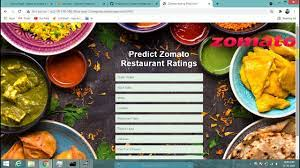


Data Storage:
This problem statement contains two datasets- Zomato.csv and country_code.csv.

Country_code.csv contains two variables:

Country code
Country name



The collected data has been stored in the Comma Separated Value file Zomato.csv. 

Each restaurant in the dataset is uniquely identified by its Restaurant Id. 

Every Restaurant contains the following variables:

• Restaurant Id: Unique id of every restaurant across various cities of the world

• Restaurant Name: Name of the restaurant

• Country Code: Country in which restaurant is located

• City: City in which restaurant is located

• Address: Address of the restaurant

• Locality: Location in the city

• Locality Verbose: Detailed description of the locality

• Longitude: Longitude coordinate of the restaurant&#39;s location

• Latitude: Latitude coordinate of the restaurant&#39;s location

• Cuisines: Cuisines offered by the restaurant

• Average Cost for two: Cost for two people in different currencies   

• Currency: Currency of the country

• Has Table booking: yes/no

• Has Online delivery: yes/ no

• Is delivering: yes/ no

• Switch to order menu: yes/no

• Price range: range of price of food

• Aggregate Rating: Average rating out of 5

• Rating color: depending upon the average rating color

• Rating text: text on the basis of rating of rating

• Votes: Number of ratings casted by people



Problem statement : In this dataset predict 2 things –
1) Average Cost for two
2) Price range
Hint : Use pandas merge operation -- pd.merge (df1,df2) to combine two datasets


### Step 1: Importing required libraries and load the dataset

In [1]:
"""importing required libraries
Pandas is a useful library in data handling. 
Numpy library used for working with arrays. 
Seaborn/Matplotlib are used for data visualisation purpose. 
Sklearn – This module contains multiple libraries having pre-implemented functions to perform tasks from data preprocessing to model development and evaluation. 
"""
#importing required libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV

from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

from subprocess import check_output

#from sklearn.externals 
import joblib
from sklearn.decomposition import PCA
from scipy.stats import zscore,probplot
#Surpress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Zomato.csv")
pd.set_option("display.max_columns",None)
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

### Attribute Information:

Each restaurant in the dataset is uniquely identified by its Restaurant Id. 

Every Restaurant contains the following variables:

• Restaurant Id: This column shows Unique id of every restaurant across various cities of the world

• Restaurant Name: This column shows Name of the restaurant

• Country Code: This column shows Country in which restaurant is located

• City: This column shows city in which restaurant is located

• Address: This column shows address of the restaurant

• Locality: This column shows Location in the city

• Locality Verbose: This column shows detailed description of the locality

• Longitude: Longitude coordinate of the restaurant&#39;s location

• Latitude: Latitude coordinate of the restaurant&#39;s location

• Cuisines: Cuisines offered by the restaurant

• Average Cost for two: Cost for two people in different currencies   

• Currency: Currency of the country

• Has Table booking: yes/no

• Has Online delivery: yes/ no

• Is delivering: yes/ no

• Switch to order menu: yes/no

• Price range: This column shows range of price of food

• Aggregate Rating: This column shows average rating out of 5

• Rating color: This column shows depending upon the average rating color

• Rating text: This column shows text on the basis of rating of rating

• Votes: This column shows Number of ratings casted by people


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [6]:
#Checking for missing values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

.0Observation:'Cuisines' column has 9 missing values.

### Step 2: EDA

In [7]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

In [8]:
df_country = pd.read_csv('countrycode.csv', delimiter="\t", encoding='utf-8')
df_country.head()

,Country Code,Country,Unnamed: 2
0,1.0,India,NaN
1,14.0,Australia,NaN
2,30.0,Brazil,NaN
3,37.0,Canada,NaN
4,94.0,Indonesia,NaN


In [9]:
df_country=df_country.drop('Unnamed: 2',axis=1)

In [10]:
df_country.shape

(16, 2)

In [11]:
final_df = pd.merge(df,df_country,on='Country Code',how='left')
final_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [12]:
final_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [13]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [14]:
country_names = final_df.Country.value_counts().index
country_names

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')

In [15]:
country_value = final_df.Country.value_counts().values

([<matplotlib.patches.Wedge at 0x20b6f6aa7f0>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

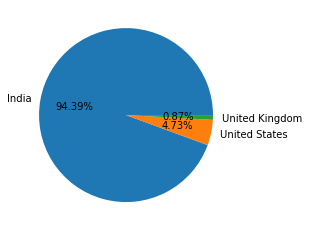

In [16]:
#Pie Chart
plt.pie(country_value[:3],labels=country_names[:3],autopct='%1.2f%%')

Observation: Maximum number of transaction happen in India for Zomato. After that USA and UnitedKingdoms 94% orders are given from India

In [17]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [18]:
rating = final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'RatingCount'})
rating

,Aggregate rating,Rating color,Rating text,RatingCount
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


Observation:
1. When Rating is between 4.5 to 4.9 is ---> Excellent
2. When Rating is between 4.0 to 3.4 is ---> Very Good
3. When Rating is between 3.5 to 3.9 is ---> Good
4. When Rating is between 3.0 to 3.4 is ---> Average
5. When Rating is between 2.5 to 2.9 is ---> Average
6. When Rating is between 2.0 to 2.4 is ---> Poor


In [19]:
rating

,Aggregate rating,Rating color,Rating text,RatingCount
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


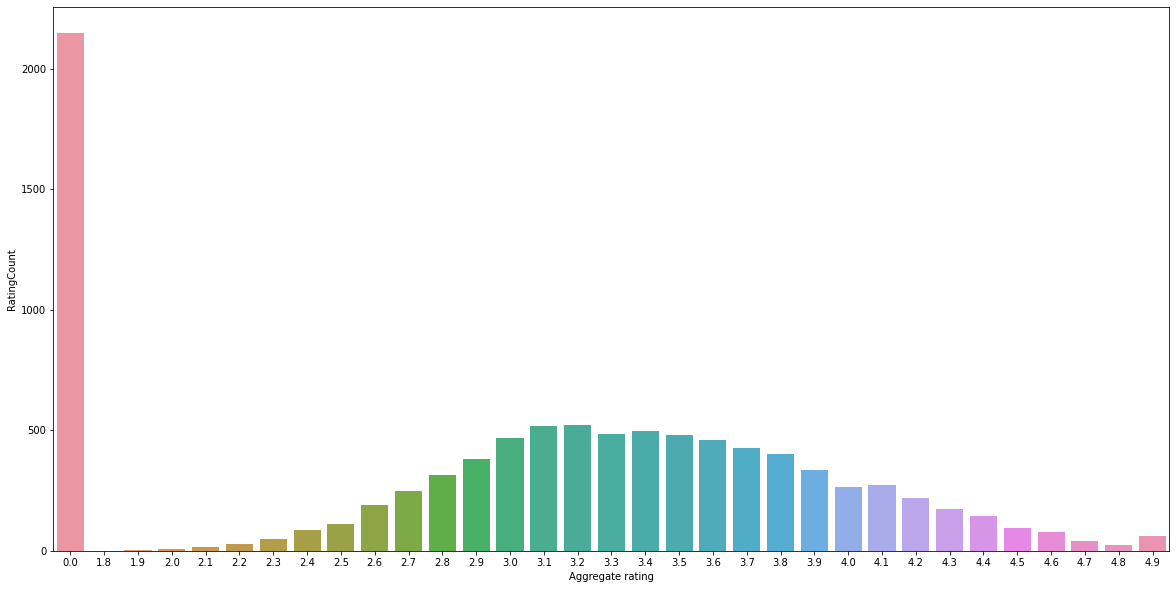

In [20]:
plt.figure(figsize=(20,10))
sns.barplot(x="Aggregate rating",y='RatingCount',data=rating)
plt.show()

Observation: More than 2000 gives 0 ratings. No one given 5 ratings

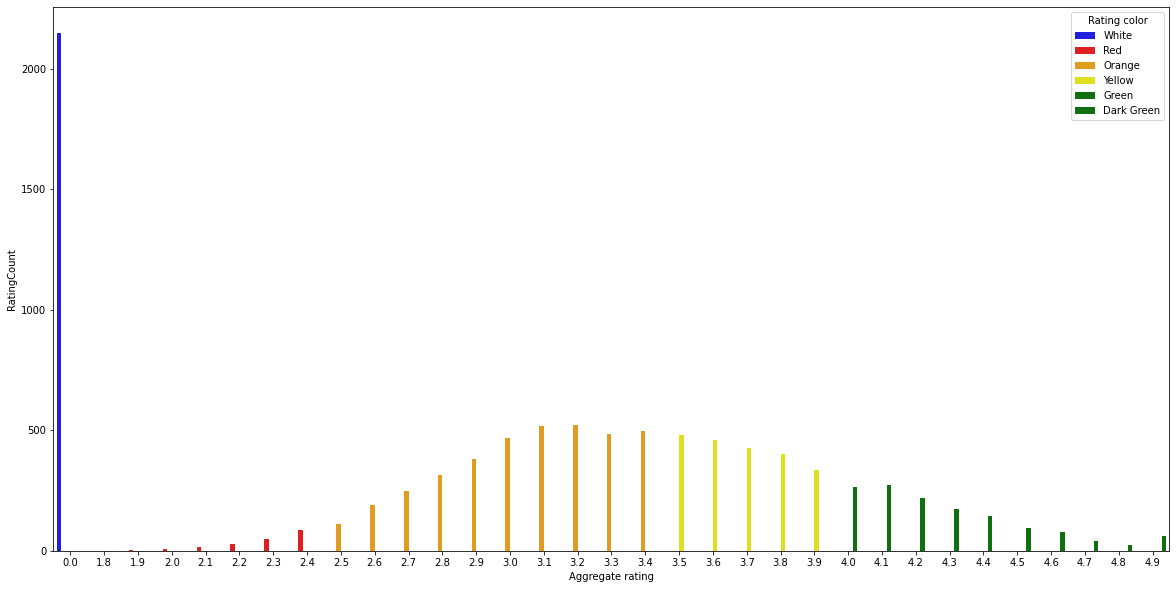

In [21]:
plt.figure(figsize=(20,10))
sns.barplot(x="Aggregate rating",y='RatingCount',data=rating,hue='Rating color',palette=['blue','red','orange','yellow','green','green'])
plt.show()

Observation:

    1.NotRated Count is very high
    
    2.Maximum number of rating are between 2.5 to 3.4

<Axes: xlabel='Rating color', ylabel='count'>

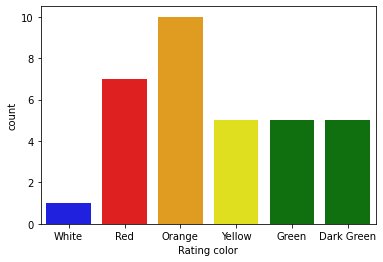

In [22]:
#Count plot
sns.countplot(x='Rating color', data=rating, palette=['blue','red','orange','yellow','green','green'])

In [23]:
#which country gives maximum 0 rating
final_df[final_df['Rating color']=='White'].groupby('Country').size().reset_index()


,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


Observation:
    Maximum number of 0 ratings are from Indian customers

In [24]:
#find out which currency is used by which country
final_df[['Country','Currency']].groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [25]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [26]:
#Which Country do have Online Delivery
final_df[final_df['Has Online delivery']=='Yes'].Country.value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

In [27]:
final_df[['Has Online delivery','Country']].groupby(['Has Online delivery','Country']).size().reset_index()

,Has Online delivery,Country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


Observation: Online deliveries available in India and UAE

In [28]:
city_values = final_df.City.value_counts().values
city_labels = final_df.City.value_counts().index

([<matplotlib.patches.Wedge at 0x20b6fe90ee0>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

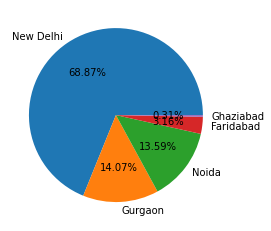

In [29]:
plt.pie(city_values[:5],labels=city_labels[:5],autopct='%1.2f%%')

Observation: 
    NewDelhi ha maximum Zomato transaction.

In [30]:
#Visualizing to Cuisines
df6 = final_df[['Cuisines','Votes']]
df6.drop_duplicates()
df7 = df6.groupby(['Cuisines'])['Votes'].sum()
df7 = df7.to_frame()
df7 = df7.sort_values('Votes',ascending=False)
df7.head()

,Votes
Cuisines,
"North Indian, Mughlai",53747
North Indian,46241
"North Indian, Chinese",42012
Cafe,30657
Chinese,21925


In [31]:
df7=df7.iloc[1:,:]
df7.head()

,Votes
Cuisines,
North Indian,46241
"North Indian, Chinese",42012
Cafe,30657
Chinese,21925
"North Indian, Mughlai, Chinese",20115


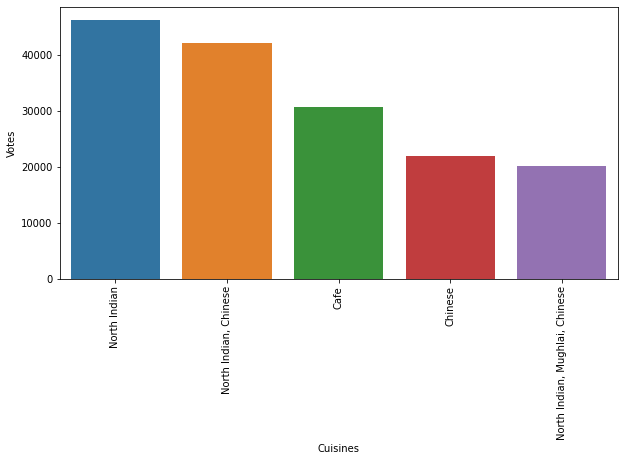

In [32]:
plt.figure(figsize=(10,5))
#sns.barplot(df7.index, df7['Votes'])
cuisines_values = df7.index
cuisines_label = df7['Votes']
sns.barplot(x=cuisines_values[:5],y=cuisines_label[:5])
plt.xticks(rotation=90)
plt.show()

In [33]:
#Removing the duplicate rows if any 
zomato_df =  final_df.drop_duplicates()
print('Shape After deleting duplicate values:',zomato_df.shape)
#printing the sample data
#i can classify categorical, qualitative, quantitative variables
zomato_df.head(10)

Shape After deleting duplicate values: (9551, 22)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,1000,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336,Phillipines
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",2000,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520,Phillipines
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",2000,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677,Phillipines
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",6000,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621,Phillipines
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532,Phillipines


Observation:
    
Target variable: Rating
    
Feature variable: location,menu,cost etc   

In [34]:
zomato_df['Country'].unique()

array(['Phillipines', 'Brazil', 'United States', 'Australia', 'Canada',
       'Singapore', 'UAE', 'India', 'Indonesia', 'New Zealand',
       'United Kingdom', 'Qatar', 'South Africa', 'Sri Lanka', 'Turkey'],
      dtype=object)

In [35]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

### Step 3: Data Visualization

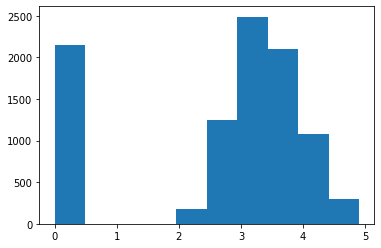

In [36]:
#creating bar chart at the target variable is Cnitinuous
x = [zomato_df['Aggregate rating']]
plt.hist(zomato_df['Aggregate rating'])
plt.show()

Observation: The distribution of target variable is satisfying.

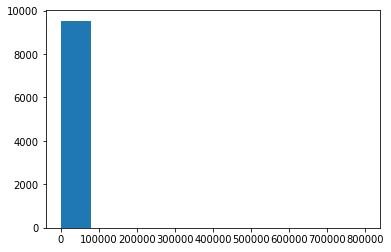

In [37]:
plt.hist(zomato_df['Average Cost for two'])
plt.show()

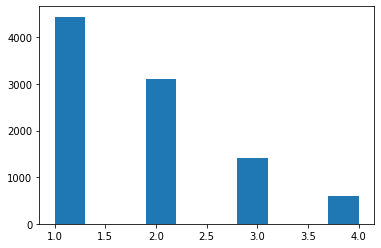

In [38]:
plt.hist(zomato_df['Price range'])
plt.show()

In [39]:
zomato_df.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

### Step 4: Feature Engineering:

In [40]:
def cuisine_counter(inpStr):
    NumCuisines = len(str(inpStr).split(','))
    return(NumCuisines)

In [41]:
#Creating a new feature in data 
zomato_df['CuisineCount'] = zomato_df['Cuisines'].apply(cuisine_counter)
zomato_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,CuisineCount
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,3
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines,1
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines,4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines,2
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines,2


In [42]:
#columns which are not useful in predictive analysis 
uselessColumns = ['Restaurant ID','Restaurant Name','Address','Locality Verbose','City','Locality','Cuisines']
zomato_df = zomato_df.drop(uselessColumns,axis=1)
zomato_df.head()

,Country Code,Longitude,Latitude,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,CuisineCount
0,162,121.027535,14.565443,1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,3
1,162,121.014101,14.553708,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines,1
2,162,121.056831,14.581404,4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines,4
3,162,121.056475,14.585318,1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines,2
4,162,121.057508,14.584450,1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines,2


In [43]:
cateorical_list = []
continuous_list = []
for col in zomato_df:
    if(zomato_df[col].dtypes=='object'):
        cateorical_list.append(col)
    else:
        continuous_list.append(col)
print("cateorical_list: ",cateorical_list)
print("\nContinuous_list: ",continuous_list)

cateorical_list:  ['Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text', 'Country']

Continuous_list:  ['Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes', 'CuisineCount']


In [44]:
def PlotBarCharts(inpData, colsToPlot):
    #Generating multiple subplots
    fig,subplot = plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle("Bar Charts of : "+str(colsToPlot))
    for colName,plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subplot[plotNumber])


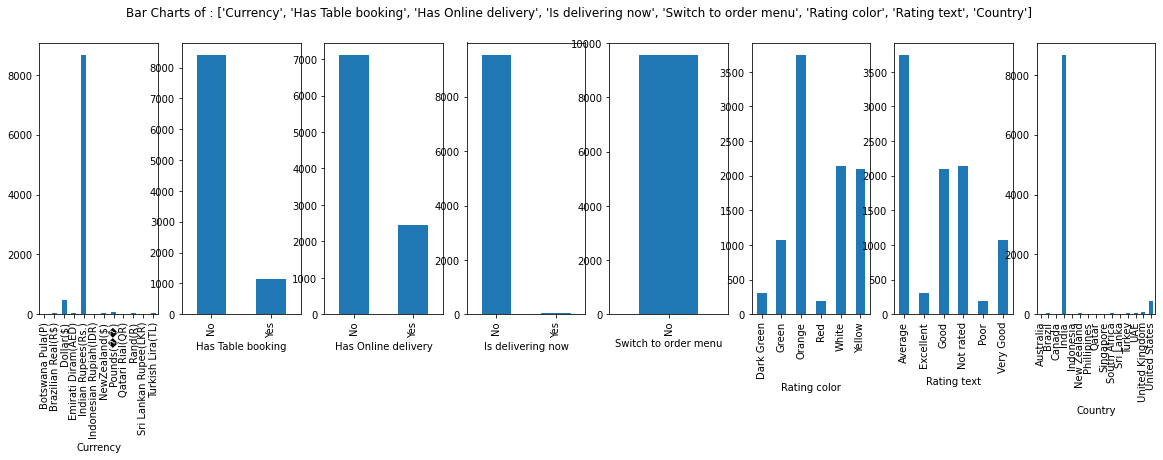

In [45]:
#calling the function
PlotBarCharts(inpData=zomato_df,colsToPlot=cateorical_list)

### Obseravtion:
    In this data,'Country','Currency','Is delivering now','Switch to order menu' are too skewed. These columns not correlated with the target variable because there is no information to learn.The algorithm cannot find any rule like when the value is this then the target variable is that.
    
    Selected Categorical Variables:  Only three categorivcal variables are selected  'Has Table booking','Has Online delivery','Is delivering now'
    

### Visualization of continuous Predictor variables in the data using histogram

In [46]:
continuous_list

['Country Code',
 'Longitude',
 'Latitude',
 'Average Cost for two',
 'Price range',
 'Aggregate rating',
 'Votes',
 'CuisineCount']

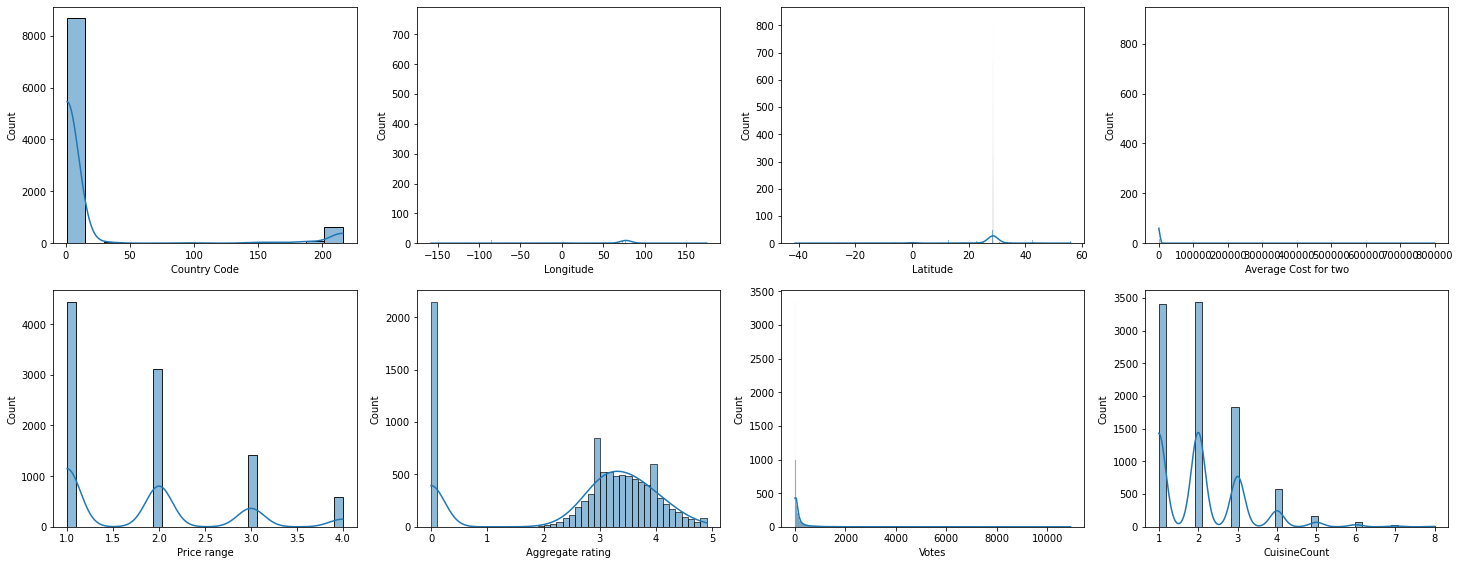

In [47]:
plt.figure(figsize=(25,20))
plt.subplot(4, 4, 1)
sns.histplot(x='Country Code',data=zomato_df,kde=True)

plt.subplot(4,4,2)
sns.histplot(x='Longitude',data=zomato_df,kde=True)

plt.subplot(4,4,3)
sns.histplot(x='Latitude',data=zomato_df,kde=True)

plt.subplot(4,4,4)
sns.histplot(x='Average Cost for two',data=zomato_df,kde=True)


plt.subplot(4,4,5)
sns.histplot(x='Price range',data=zomato_df,kde=True)


plt.subplot(4,4,6)
sns.histplot(x='Aggregate rating',data=zomato_df,kde=True)


plt.subplot(4,4,7)
sns.histplot(x='Votes',data=zomato_df,kde=True)


plt.subplot(4,4,8)
sns.histplot(x='CuisineCount',data=zomato_df,kde=True)
plt.show()


### Step 5: Handaling Outliers
    

In [49]:
#finding nearest values to 4000 mark
#Replacing outliers for 'Votes'
zomato_df['Votes'][zomato_df['Votes']<4000].sort_values(ascending=False)

7863    3986
821     3848
3992    3697
3119    3591
1861    3569
        ... 
4801       0
4803       0
4805       0
4807       0
4784       0
Name: Votes, Length: 9532, dtype: int64

Observation: Above result shows the nearset logical value is 3986,hence,replacing any value above 4000 with it

In [50]:
#Replacing outliers with nearset possible value
zomato_df['Votes'][zomato_df['Votes']>4000] = 3986

In [51]:
#Replacing Outiliers for 'Average Cost for two'
zomato_df['Average Cost for two'][zomato_df['Average Cost for two']<50000].sort_values(ascending=False) 

7543    8000
4088    7000
4087    6500
7494    6000
7538    6000
        ... 
85         0
87         0
240        0
397        0
9242       0
Name: Average Cost for two, Length: 9530, dtype: int64

In [52]:
zomato_df['Average Cost for two'][zomato_df['Average Cost for two']>50000] = 8000

array([[<Axes: title={'center': 'Votes'}>,
        <Axes: title={'center': 'Average Cost for two'}>]], dtype=object)

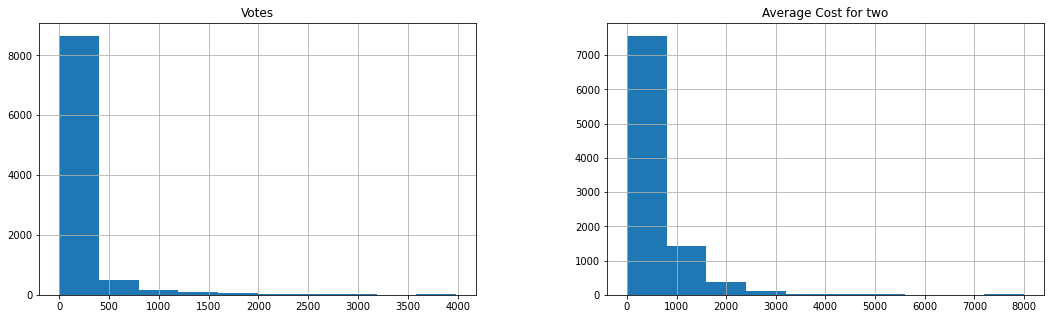

In [53]:
zomato_df.hist(['Votes','Average Cost for two'],figsize=(18,5))

In [54]:
print("Missing values in dataset: ",zomato_df.isnull().sum().sum())

Missing values in dataset:  0


### Relationship exploration: Continuous Vs Continuous Scatter Charts

When the target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using persson's correlation value.

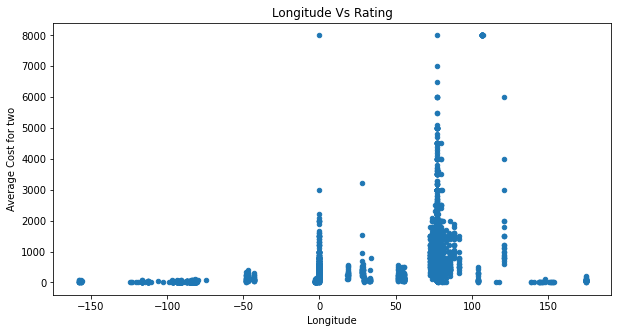

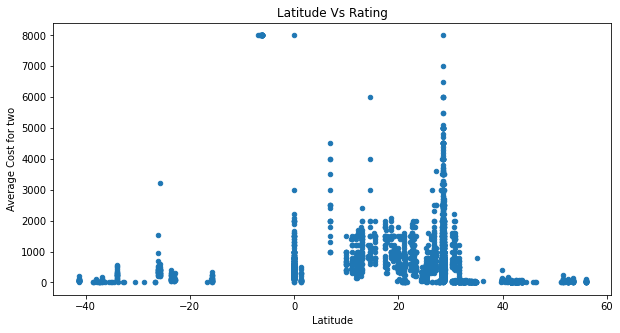

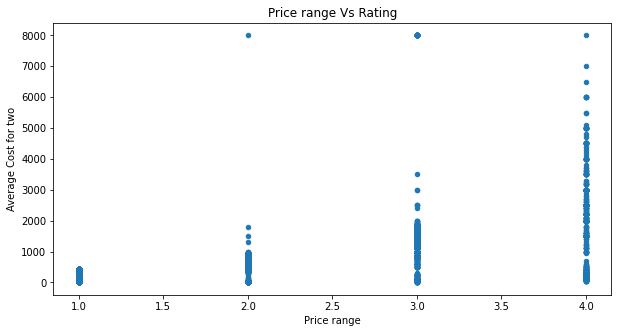

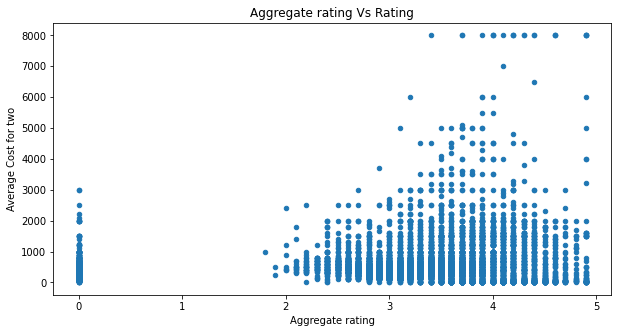

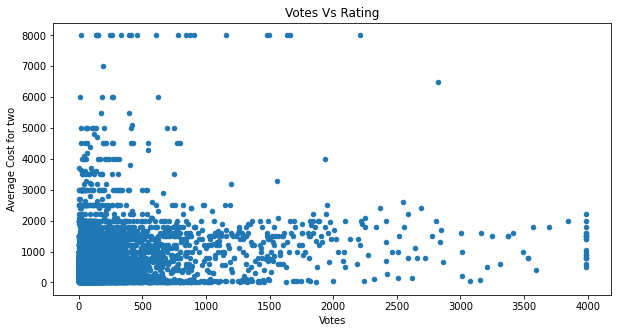

In [55]:
#ContinuousCols = ['Longitude','Latitude','Votes','Average Cost for two']
ContinuousCols = ['Longitude', 'Latitude', 'Price range', 'Aggregate rating', 'Votes']

#Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    zomato_df.plot.scatter(x=predictor,y='Average Cost for two',figsize=(10,5),title=predictor+" Vs Rating")

In [56]:
#calcualting correlation matrix
#ContinuousCols = ['Aggregate rating','Longitude','Latitude','Votes','Average Cost for two']
ContinuousCols =['Longitude', 'Latitude', 'Price range', 'Aggregate rating', 'Votes','Average Cost for two']
#creating the correlation matrix
CorrelationData = zomato_df[ContinuousCols].corr()
CorrelationData

,Longitude,Latitude,Price range,Aggregate rating,Votes,Average Cost for two
Longitude,1.000000,0.043207,-0.078939,-0.116818,-0.101381,0.210272
Latitude,0.043207,1.000000,-0.166688,0.000516,-0.019687,-0.064748
Price range,-0.078939,-0.166688,1.000000,0.437944,0.341729,0.611634
Aggregate rating,-0.116818,0.000516,0.437944,1.000000,0.346906,0.240494
Votes,-0.101381,-0.019687,0.341729,0.346906,1.000000,0.245662
Average Cost for two,0.210272,-0.064748,0.611634,0.240494,0.245662,1.000000


In [57]:
#Filtering only those columns where absolute correlation >0.5 with Target Variable
#reduce the 0.5 threshold if no variable is selcted like in this case
CorrelationData['Average Cost for two'][abs(CorrelationData['Average Cost for two'])>0.2]

Longitude               0.210272
Price range             0.611634
Aggregate rating        0.240494
Votes                   0.245662
Average Cost for two    1.000000
Name: Average Cost for two, dtype: float64

Final selected continuous columns:
    'Aggregate rating','Longitude','Votes','Price range','Average Cost for two'

### Relationship exploration:Categorical Vs Continuous --Box Plots

When the traget variable is continuous and the predictor variable is caegorical we analyze the relation using Boxplots and measure the strength of relation using Anova test

In [58]:
zomato_df.columns

Index(['Country Code', 'Longitude', 'Latitude', 'Average Cost for two',
       'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes', 'Country',
       'CuisineCount'],
      dtype='object')

In [59]:
zomato_df.columns

Index(['Country Code', 'Longitude', 'Latitude', 'Average Cost for two',
       'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes', 'Country',
       'CuisineCount'],
      dtype='object')

In [60]:
cateorical_list

['Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Rating color',
 'Rating text',
 'Country']

<Axes: xlabel='Has Table booking', ylabel='Average Cost for two'>

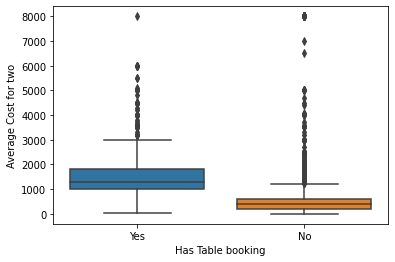

In [61]:
#for categorical target variable 'Average Cost for two' and continuous predictors
sns.boxplot(data=zomato_df, x="Has Table booking", y="Average Cost for two")

<Axes: xlabel='Has Online delivery', ylabel='Average Cost for two'>

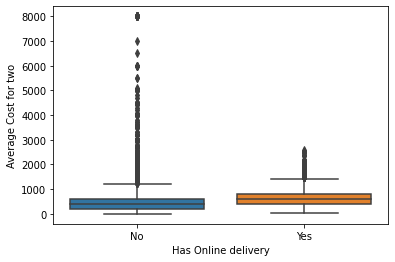

In [62]:
sns.boxplot(data=zomato_df, x="Has Online delivery", y="Average Cost for two")

<Axes: xlabel='Price range', ylabel='Average Cost for two'>

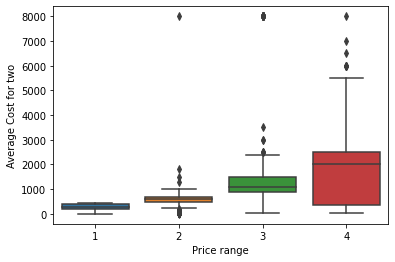

In [63]:
sns.boxplot(data=zomato_df, x="Price range", y="Average Cost for two")

Observation:
    These plots give an idea about the data distribution of continuous predictor in the Y--axis for each of categorical variable in the X-axis.
    
    In this data, all three categorical predictors looks correlated with Target variable.

### Step 6: Statistical Feature selection (CategoricalVs Continuous) using ANOVA test

In [64]:
#Defining a function to find the statistical relation with all the categorical variable
def FunctionAnova(inpData, TargetVariable, CategoricalPreditorList):
    
    from scipy.stats import f_oneway
    
    #Creating an empty list of final selescted predictors
    SelectedPredictors=[]
    print('#### ANOVA RESULTS ####')
    for predictor in CategoricalPreditorList:
        CategoryGroupLists = inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        #If the ANOVA P-value is < 0.05,that means we reject H0
        if(AnovaResults[1]<0.05):
            print(predictor,'is correlated with',TargetVariable,'| P-Value:',AnovaResults)
            SelectedPredictors.append(predictor)
        else:
            print(predictor,'is NOT correlated with',TargetVariable,'| P_Valuw:',AnnovaResults)
    return(SelectedPredictors)
            

In [65]:
#calling the fucntion to check which categorical variables are correlated with target 
CategoricalPreditorList = ['Has Table booking','Has Online delivery','Price range']
FunctionAnova(inpData= zomato_df,
              TargetVariable='Average Cost for two',
              CategoricalPreditorList=CategoricalPreditorList)

#### ANOVA RESULTS ####
Has Table booking is correlated with Average Cost for two | P-Value: F_onewayResult(statistic=3205.9726748180938, pvalue=0.0)
Has Online delivery is correlated with Average Cost for two | P-Value: F_onewayResult(statistic=44.04800862228366, pvalue=3.378329612002763e-11)
Price range is correlated with Average Cost for two | P-Value: F_onewayResult(statistic=2050.078435212832, pvalue=0.0)


['Has Table booking', 'Has Online delivery', 'Price range']

#### Final Selected Categorical Columns:

'Has Table booking','Has Online delivery','Price range'

#### Selecting Final Predictors for Machine Learning

In [66]:
#Selecting Final Predictor for Machine learning
SelectedCols =['Votes','Average Cost for two','Has Table booking','Has Online delivery','Price range']
DataforML = zomato_df[SelectedCols]
DataforML.head()

,Votes,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,314,1100,Yes,No,3
1,591,1200,Yes,No,3
2,270,4000,Yes,No,4
3,365,1500,No,No,4
4,229,1500,Yes,No,4


### Step 7: Data Pre-processing for Machine Learning

In [67]:
#Converting the binary nominal variable to numeric using 1/0 mapping
DataforML['Has Table booking'].replace({'Yes':1, 'No':0}, inplace=True)
DataforML['Has Online delivery'].replace({'Yes':1, 'No':0}, inplace=True)

In [68]:
#Converting the nominal variable to numeric using get_dummies()
#Treating all the nominal variables at once using dummy variables
DataforML_Numeric = pd.get_dummies(DataforML)

#Adding Target Variable to the data
DataforML_Numeric['Aggregate rating'] = zomato_df['Aggregate rating']

#Printing Sample rows
DataforML_Numeric.head()

,Votes,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating
0,314,1100,1,0,3,4.8
1,591,1200,1,0,3,4.5
2,270,4000,1,0,4,4.4
3,365,1500,0,0,4,4.9
4,229,1500,1,0,4,4.8


In [69]:
DataforML_Numeric.dtypes

Votes                     int64
Average Cost for two      int64
Has Table booking         int64
Has Online delivery       int64
Price range               int64
Aggregate rating        float64
dtype: object

In [70]:
#Separeting Target variable and predictors
TargetVariable=['Average Cost for two']
Predictors=['Votes','Has Table booking',
       'Has Online delivery', 'Price range','Aggregate rating']

In [71]:
X = DataforML_Numeric.drop(['Average Cost for two'],axis=1)
y = DataforML_Numeric['Average Cost for two']

#split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

### Standardization/Normalization of data

You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data.

In [72]:
'''Sandardization of data'''
PredictorScaler=MinMaxScaler()

#Storing the fit object for later reference
PredictorScalerFit =PredictorScaler.fit(X)
#Generating the 
X  = PredictorScalerFit.transform(X)
#split the data into training and testing set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [73]:
X_train

array([[0.01103864, 0.        , 0.        , 0.33333333, 0.79591837],
       [0.00250878, 0.        , 0.        , 0.33333333, 0.63265306],
       [0.        , 0.        , 0.        , 0.33333333, 0.        ],
       ...,
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.01655795, 0.        , 0.        , 1.        , 0.89795918],
       [0.04892122, 0.        , 1.        , 0.33333333, 0.75510204]])

In [74]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6685, 5)
(2866, 5)
(6685,)
(2866,)


### Step 8: Model building

In [76]:
from sklearn.tree import DecisionTreeRegressor 

dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

dt.fit(X,y)
rf.fit(X,y)

dt_score = dt.score(X,y)
rf_score = rf.score(X,y)

In [77]:
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

dt.fit(X,y)
rf.fit(X,y)

dt_scores = cross_val_score(dt, X, y, cv = 10)
rf_scores = cross_val_score(rf, X, y, cv = 10) 

dt_score = round(sum(dt_scores )/len(dt_scores ), 3)
rf_score = round(sum(rf_scores )/len(rf_scores ), 3)

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
test_size=0.20, random_state=0)

dt = DecisionTreeRegressor(random_state=0, criterion="mae")
dt_fit = dt.fit(X_train, y_train)

dt_scores = cross_val_score(dt_fit, X_train, y_train, cv = 5)
print("mean cross validation score: {}".format(np.mean(dt_scores)))
print("score without cv: {}".format(dt_fit.score(X_train, y_train)))

# on the test or hold-out set
from sklearn.metrics import r2_score
print(r2_score(y_test, dt_fit.predict(X_test)))
print(dt_fit.score(X_test, y_test))

mean cross validation score: 0.06411346321709913
score without cv: 0.977367910862492
0.16925820023544613
0.16925820023544613


In [80]:
from sklearn.metrics import make_scorer

scoring = make_scorer(r2_score)
g_cv = GridSearchCV(DecisionTreeRegressor(random_state=0),
              param_grid={'min_samples_split': range(2, 10)},
              scoring=scoring, cv=5, refit=True)

g_cv.fit(X_train, y_train)
g_cv.best_params_

result = g_cv.cv_results_
# print(result)
r2_score(y_test, g_cv.best_estimator_.predict(X_test))

0.35906038659428785

### Step 9: Pickeling Model

In [81]:
#Saving Model
import pickle
zomato_model = 'zomato.pickle'
pickle.dump(dt,open(zomato_model,'wb'))

In [82]:
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(zomato_model, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.16925820023544613


### Step 10: (B)In this dataset predict - 'Price range'

In [83]:
DataforML_Numeric

,Votes,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating
0,314,1100,1,0,3,4.8
1,591,1200,1,0,3,4.5
2,270,4000,1,0,4,4.4
3,365,1500,0,0,4,4.9
4,229,1500,1,0,4,4.8
...,...,...,...,...,...,...
9546,788,80,0,0,3,4.1
9547,1034,105,0,0,3,4.2
9548,661,170,0,0,4,3.7
9549,901,120,0,0,4,4.0


The Price range for the input is: [[4.50668725]]
The Price range trend graph:


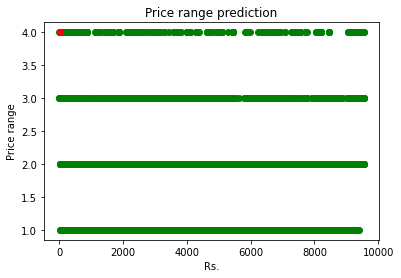

In [84]:
from sklearn.linear_model import LinearRegression


X = DataforML_Numeric.drop(['Price range'],axis=1)
Y = DataforML_Numeric['Price range'] 
Y = Y.values.reshape(-1, 1)

clf = LinearRegression()
clf.fit(X, Y)

inp = np.array([[270],[4000],[1],[0],[4.4]])
inp = inp.reshape(1, -1)

day_index = 4
days = [i for i in range(Y.size)]

print('The Price range for the input is:',clf.predict(inp))
print("The Price range trend graph:")
plt.scatter(days,Y,color = 'g')
plt.scatter(days[day_index], Y[day_index], color='r')
plt.title('Price range prediction')
plt.xlabel('Rs.')
plt.ylabel('Price range')
plt.show()
